# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [22]:
# Your work here.
print(df.head())
df.shape

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0


(130, 3)

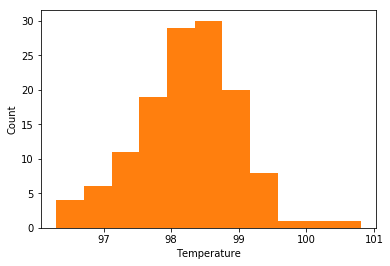

In [24]:
#Explore the distribution of body temperatures
import matplotlib.pyplot as plt
n = df.shape[0]**0.5
plt.hist(df['temperature'], bins=int(n))
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

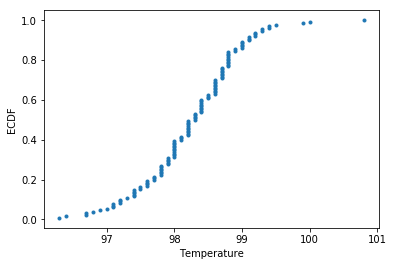

In [25]:
#Is body temperature normally distributed?
#Generate Empirical CDF based on observed body temperatures
import numpy as np
temps = np.sort(list(df['temperature']))
index = np.arange(1, len(temps) + 1) / len(temps)
plt.plot(temps, index, marker='.', linestyle='none')
plt.xlabel('Temperature')
plt.ylabel('ECDF')
plt.show()

In [37]:
#Sample a normal distribution using the mean and standard deviation calculated from the body temperature data
mu = np.mean(temps)
sd = np.std(temps)
samples = np.random.normal(mu, sd, 10000)
#Order samples and calculate their percentiles for CDF plot
sample_cdf_x = np.sort(samples)
sample_cdf_y = np.arange(1, len(samples) + 1) / len(samples)

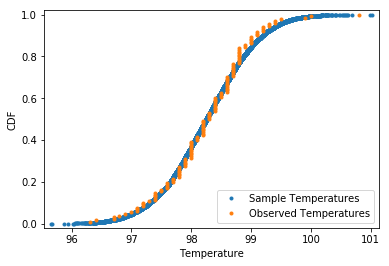

In [44]:
#Plot the Empirical CDF and the CDF of the sample to compare the distributions
plt.plot(sample_cdf_x, sample_cdf_y, marker='.', linestyle='none')
plt.plot(temps, index, marker='.', linestyle='none')
plt.xlabel('Temperature')
plt.ylabel('CDF')
plt.margins(0.02)
plt.legend(('Sample Temperatures','Observed Temperatures'), loc='lower right')
plt.show()

**Answer to question 1**: Body temperatures appear to follow a normal distribution.

**Question 2**: Is the sample size large? Are the observations independent?

In order for the Central Limit Theorem to apply, we must have a sample size n >= 30.

In [47]:
n = df.shape[0]
print(n)

130


The sample size is large enough.

Observations are considered independent if the occurrence of one event doesn't change the probability of another. In this study, the observations of body temperatures are independent.

**Question 3**: Is the true population mean really 98.6$^{\circ}$F?
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?

To answer this question, I will use a one-sample test since we only have the data for the sample mean. The sample size is 130, so the z statistic can be used.

In [49]:
#Print the sample mean as a reference point
print(mu)

98.2492307692


The null hypothesis is that the population mean is 98.6. Calculate the probability of sampling a mean *at least* as extreme as the mean calculated above.

In [59]:
#Simulate the repetition of the experiment 10,000 times, storing the mean of each sample.
bs_replicates = np.empty(10000)
for i in range(10000):
    bs_sample = np.random.choice(temps, len(temps))
    bs_replicates[i] = np.mean(bs_sample)
print(bs_replicates[:50])

[ 98.29846154  98.18846154  98.29692308  98.28846154  98.20615385
  98.25769231  98.25307692  98.07769231  98.22923077  98.28307692  98.24
  98.27        98.28230769  98.24461538  98.28923077  98.24230769
  98.26076923  98.34153846  98.23076923  98.40076923  98.17923077
  98.31230769  98.23538462  98.27692308  98.25846154  98.14384615
  98.27307692  98.15307692  98.35307692  98.29384615  98.18846154
  98.23923077  98.23846154  98.25846154  98.33307692  98.27461538
  98.27846154  98.26384615  98.22        98.26307692  98.36769231
  98.33538462  98.15461538  98.32        98.24076923  98.22461538
  98.17230769  98.31        98.22846154  98.16769231]


In [61]:
#Difference in means
pop_mean = 98.6
diff_mean = mu - pop_mean
print(diff_mean)

-0.350769230769


In [62]:
#Shift body temperature data so that sample mean = population mean
temps_shifted = temps - mu + pop_mean
print(np.mean(temps_shifted))

98.6


In [75]:
#Calculate test statistic
(diff_mean * np.sqrt(len(temps))) / sd

-5.4759252020781144

In [82]:
#Simulate experiment 10,000 times with shifted data, storing the difference of means in an array of bootstrap replicates.
np.random.seed(4321)
n_sim = 10000
bs_replicates = np.empty(n_sim)
for i in range(n_sim):
    bs_sample = np.random.choice(temps_shifted, len(temps_shifted))
    bs_replicates[i] = np.mean(bs_sample) - pop_mean
p_value = np.sum(bs_replicates <= diff_mean) / len(bs_replicates)
print(p_value)

0.0


In [71]:
#For reference, compare "hacker" statistics to output from stats t-test function
from scipy import stats
stats.ttest_1samp(temps, 98.6)

Ttest_1sampResult(statistic=-5.4548232923640771, pvalue=2.4106320415610081e-07)

For the purpose of hypothesis testing with a large sample and sizeable difference between the sample mean and population mean, a t-test and a z-test will both result in extremely small p-values.

**Question 4**: Draw a small sample of size 10 from the data and repeat both tests. 
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?

In [80]:
#Draw a sample of size 10
sample_10 = np.random.choice(temps, 10)
print(sample_10)

[ 98.8  96.7  99.4  98.3  98.   99.   98.2  97.4  98.   98. ]


In [83]:
n_sim = 10000
bs_replicates = np.empty(n_sim)
for i in range(n_sim):
    bs_sample = np.random.choice(temps_shifted, 10)
    bs_replicates[i] = np.mean(bs_sample) - pop_mean
p_value = np.sum(bs_replicates <= diff_mean) / len(bs_replicates)
print(p_value)

0.0617
